<a href="https://colab.research.google.com/github/SemenutaEgor/Extreme-events-in-phenomenological-neural-networks-with-different-types-of-connections/blob/master/Dragon_king_like_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
#задаём параметры, функцию гамма и саму систему из двух связных нейронов
a = 1
b = 3
c = 1
d = 5
x_r = -1.6
r = 0.01
s = 5
I = 4
v_s = 2
lambd = 10
Theta = -0.25

Gamma = lambda x_i: 1 / (1 + np.exp(-lambd * (x_i - Theta)))

def two_HRs(t, X, k1, k2):
    x1, y1, z1, x2, y2, z2  = X
    dx1 = y1 - a*x1**3 + b*x1**2 -z1 + I - k1*(x1 - v_s) * Gamma(x2)
    dy1 = c - d*x1**2 - y1
    dz1 = r*(s*(x1 - x_r) - z1)
    
    dx2 = y2 - a*x2**3 + b*x2**2 -z2 + I - k2*(x2 - v_s) * Gamma(x1)
    dy2 = c - d*x2**2 - y2
    dz2 = r*(s*(x2 - x_r) - z2)
    return [dx1, dy1, dz1, dx2, dy2, dz2]

In [84]:
k1 = -0.17
k2 = -0.17

initials = [-1.5, 0, 0, -1.5, 0, 0]

sol = solve_ivp(two_HRs, [0, 30000], initials, rtol = 1e-11, atol = 1e-11, dense_output=True, args = (k1, k2))
ts = sol.t
x1s, y1s, z1s, x2s, y2s, z2s = sol.y

In [85]:
xsum = []

for i in range(len(x1s)):
    xsum.append(x1s[i] + x2s[i])

ts_a = ts[120000:]
xsum_a = xsum[120000:]

# initials = [x1s[-1], y1s[-1], z1s[-1], x2s[-1], y2s[-1], z2s[-1]]

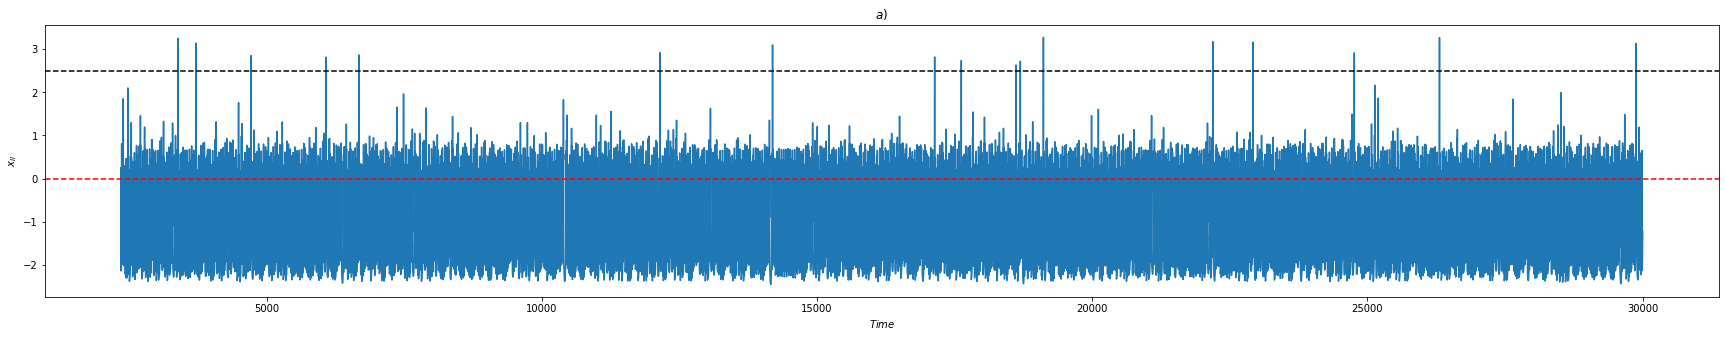

In [86]:
Hee = 2.5

fig = plt.figure(figsize = (30, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot (ts_a, xsum_a)
plt.axhline(y = Hee, color ="black", linestyle ="--")
plt.axhline(y = 0, color ="red", linestyle ="--")
ax.set_xlabel("$Time$")
ax.set_ylabel("$x_{II}$")
plt.title("$a)$")
plt.show();

In [87]:

Hs = np.linspace(1.2, 4.0, 100)
prob_arr = []

spike_counter = 0
for i in range(len(ts_a)):
    if xsum_a[i] > 0:
      spike_counter+=1
all_spikes = spike_counter

for j in range(len(Hs)):
  spike_counter = 0
  for i in range(len(ts_a)):
    if xsum_a[i] > Hs[j]:
      spike_counter+=1
  
  if spike_counter == 0:
    probability = 0
  else:
    probability = spike_counter / all_spikes
  
  prob_arr.append(probability)

print(prob_arr)


[0.028909127806509935, 0.027476278034351497, 0.026117223100244138, 0.024641326339222572, 0.023288420974952803, 0.022353686359639142, 0.021511195291889332, 0.020748648632028188, 0.01984466186590248, 0.018829982842700155, 0.017895248227386494, 0.017366385221353767, 0.016819073505808267, 0.016259462650587593, 0.015742898784230044, 0.015207886208359726, 0.014679023202326997, 0.014297749872396426, 0.013965673101166573, 0.013596698910911182, 0.013153929882604712, 0.01279110526218691, 0.012336037094205261, 0.011782575808822172, 0.01145664860742991, 0.011186067534575956, 0.010933935171234772, 0.01058955926032974, 0.010282080768450247, 0.010023798835271472, 0.009845461309981367, 0.009593328946640183, 0.00926125217541033, 0.009046017231094685, 0.008781585728078321, 0.008603248202788214, 0.008424910677498109, 0.008258872291883183, 0.008068235626917898, 0.007883748531790202, 0.0076931118668249155, 0.007533223051047579, 0.007311838536894344, 0.007121201871929058, 0.006918266067288593, 0.00669688155

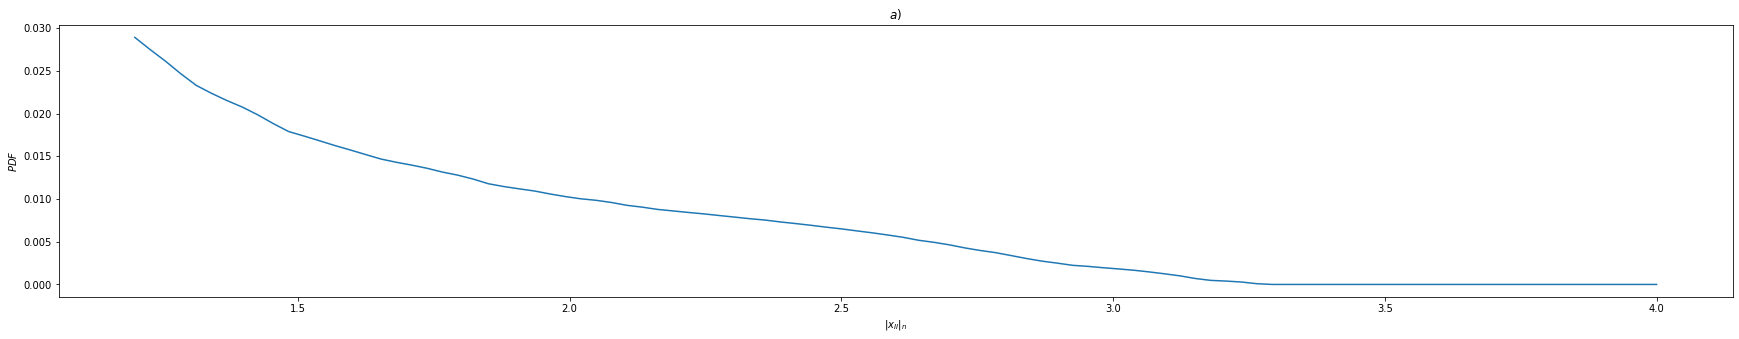

In [88]:
fig = plt.figure(figsize = (30, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(Hs, prob_arr)
ax.set_xlabel("$|x_{II}|_{n}$")
ax.set_ylabel("$PDF$")
plt.title("$a)$")
plt.show();